In [44]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential,Model
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('selfie_dataset.txt', header=None,delim_whitespace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,00a454da495e11e28a7322000a1fa414_6,3.901,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,00cddb96ac4c11e3a30212279ba1b65f_6,4.385,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,01cdd7aa1a1a11e2aaa822000a1fb0dd_6,4.243,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,024696bead0c11e389d50ec42b3b1b1c_6,4.169,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,026df048221a11e2b52122000a1fa4b5_6,3.873,-1,1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [14]:
data.columns = ['image_name', 'popularity_score','partial_faces', 'is_female', 'baby', 'child', 'teenager', 'youth', 'middle_age', 'senior', 'white', 'black', 'asian' ,'oval_face', 'round_face', 'heart_face', 'smiling', 'mouth_open', 'frowning', 'wearing_glasses' ,'wearing_sunglasses', 'wearing_lipstick', 'tongue_out','duck_face', 'black_hair' ,'blond_hair' ,'brown_hair', 'red_hair', 'curly_hair' ,'straight_hair', 'braid_hair', 'showing_cellphone', 'using_earphone', 'using_mirror', 'braces', 'wearing_hat', 'harsh_lighting', 'dim_lighting']

In [15]:
data.head()

,image_name,popularity_score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior,...,curly_hair,straight_hair,braid_hair,showing_cellphone,using_earphone,using_mirror,braces,wearing_hat,harsh_lighting,dim_lighting
0,00a454da495e11e28a7322000a1fa414_6,3.901,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,00cddb96ac4c11e3a30212279ba1b65f_6,4.385,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,01cdd7aa1a1a11e2aaa822000a1fb0dd_6,4.243,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,024696bead0c11e389d50ec42b3b1b1c_6,4.169,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,026df048221a11e2b52122000a1fa4b5_6,3.873,-1,1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [16]:
data.columns

Index(['image_name', 'popularity_score', 'partial_faces', 'is_female', 'baby',
       'child', 'teenager', 'youth', 'middle_age', 'senior', 'white', 'black',
       'asian', 'oval_face', 'round_face', 'heart_face', 'smiling',
       'mouth_open', 'frowning', 'wearing_glasses', 'wearing_sunglasses',
       'wearing_lipstick', 'tongue_out', 'duck_face', 'black_hair',
       'blond_hair', 'brown_hair', 'red_hair', 'curly_hair', 'straight_hair',
       'braid_hair', 'showing_cellphone', 'using_earphone', 'using_mirror',
       'braces', 'wearing_hat', 'harsh_lighting', 'dim_lighting'],
      dtype='object')

In [17]:
data = data[['image_name', 'popularity_score', 'partial_faces', 'is_female', 'baby','child', 'teenager', 'youth', 'middle_age', 'senior']]

In [18]:
data.shape

(46836, 10)

In [19]:
data.to_csv('dataframe.csv')

In [20]:
data.is_female.value_counts()

 1    33655
-1    11572
 0     1609
Name: is_female, dtype: int64

In [21]:
data.loc[data.is_female == 0]

,image_name,popularity_score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior
63,10004084_506899302747244_15641344_a,4.671,1,0,-1,-1,-1,1,-1,-1
138,10004140_305029942981930_1813939840_a,4.446,1,0,-1,1,-1,-1,-1,-1
169,10004164_681799591879909_1358216422_a,4.642,-1,0,1,-1,-1,-1,-1,-1
258,10004260_626844910717803_238210011_a,4.078,1,0,-1,-1,-1,-1,-1,-1
273,10004271_490200724435644_145354851_a,4.293,1,0,-1,-1,-1,-1,-1,-1
308,10004289_435361946599784_134328931_a,2.645,-1,0,-1,-1,-1,-1,-1,-1
343,10004311_256137591232800_823429360_a,4.926,-1,0,-1,-1,-1,1,-1,-1
381,10004327_639549949447603_34267237_a,4.454,1,0,-1,-1,-1,-1,-1,-1
386,10004335_1407461809524287_542123006_a,3.148,1,0,-1,-1,-1,-1,-1,-1
453,10005125_268433416668148_434265046_a,3.650,-1,0,-1,-1,-1,-1,-1,-1


In [22]:
data.loc[(data.is_female == 0) & (data.baby ==-1)].head()

,image_name,popularity_score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior
63,10004084_506899302747244_15641344_a,4.671,1,0,-1,-1,-1,1,-1,-1
138,10004140_305029942981930_1813939840_a,4.446,1,0,-1,1,-1,-1,-1,-1
258,10004260_626844910717803_238210011_a,4.078,1,0,-1,-1,-1,-1,-1,-1
273,10004271_490200724435644_145354851_a,4.293,1,0,-1,-1,-1,-1,-1,-1
308,10004289_435361946599784_134328931_a,2.645,-1,0,-1,-1,-1,-1,-1,-1


In [23]:
data.senior.value_counts()

-1    46820
 1       16
Name: senior, dtype: int64

In [ ]:
data.loc[data.is_female ==1 & 

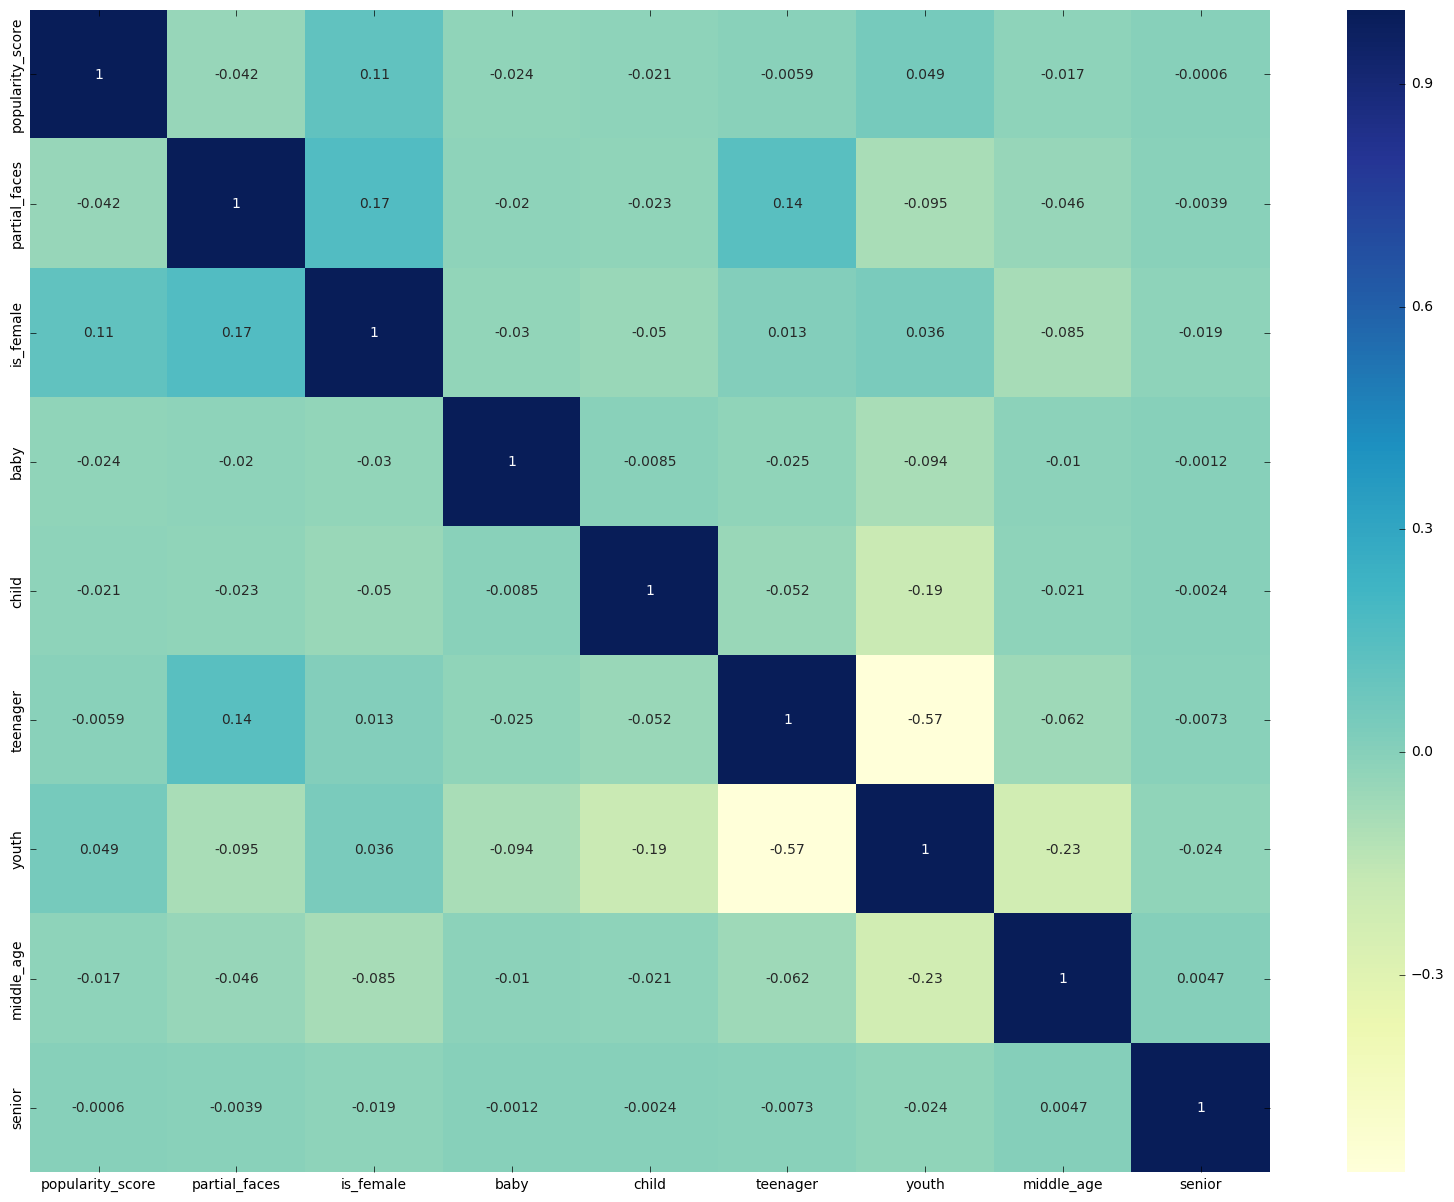

In [24]:
cor = data.corr()
round(cor,1)
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

In [25]:
data[['popularity_score','is_female']]

,popularity_score,is_female
0,3.901,1
1,4.385,1
2,4.243,1
3,4.169,-1
4,3.873,1
5,4.458,1
6,4.679,1
7,4.042,1
8,3.760,1
9,3.302,1


C:\Users\M1049231\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


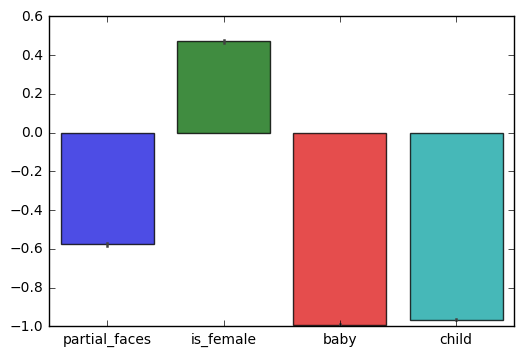

In [26]:
sns.barplot(data = data.iloc[:,2:6], alpha=0.8)
plt.show()

In [27]:
data.shape

(46836, 10)

## loading data

In [60]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('train_data',
                                                 target_size = (306, 306),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test_data',
                                            target_size = (306, 306),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 65994 images belonging to 7 classes.
Found 11880 images belonging to 7 classes.


In [64]:
print(test_set.class_indices)

{'is_female': 2, 'child': 1, 'senior': 4, 'youth': 6, 'baby': 0, 'teenager': 5, 'middle_age': 3}


## Resnet50

In [29]:
resNet_model = keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(306, 306, 3))

C:\Users\M1049231\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [30]:
resNet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 306, 306, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 312, 312, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 153, 153, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 153, 153, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [39]:
mode = Sequential()
for layer in v3_model.layers:
    print(layer.trainable)

False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

## Inception V3

In [33]:
v3_model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(306, 306, 3), pooling=None, classes=1000)

In [35]:
v3_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 306, 306, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 152, 152, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 152, 152, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 152, 152, 32) 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [40]:
for layer in v3_model.layers:
    layer.trainable = False

In [45]:
# add a global spatial average pooling layer
x = v3_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(7, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=v3_model.input, outputs=predictions)

In [48]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 306, 306, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 152, 152, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 152, 152, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 152, 152, 32) 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [49]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit_generator(training_set,validation_data=test_set, steps_per_epoch=100, epochs=25, validation_steps=2)

Epoch 1/25
100/100 [==============================] - 1074s 11s/step - loss: 9.4323 - val_loss: 9.0664
Epoch 2/25
100/100 [==============================] - 879s 9s/step - loss: 9.4039 - val_loss: 8.0590
Epoch 3/25
100/100 [==============================] - 852s 9s/step - loss: 9.2995 - val_loss: 8.0590
Epoch 4/25
100/100 [==============================] - 831s 8s/step - loss: 9.1168 - val_loss: 9.0664
Epoch 5/25
100/100 [==============================] - 838s 8s/step - loss: 9.2478 - val_loss: 7.3035
Epoch 6/25
100/100 [==============================] - 872s 9s/step - loss: 9.2729 - val_loss: 7.3035
Epoch 7/25
100/100 [==============================] - 887s 9s/step - loss: 9.3586 - val_loss: 9.0664
Epoch 8/25
100/100 [==============================] - 854s 9s/step - loss: 9.4694 - val_loss: 8.0590
Epoch 9/25
100/100 [==============================] - 905s 9s/step - loss: 9.3535 - val_loss: 9.0664
Epoch 10/25
100/100 [==============================] - 944s 9s/step - loss: 9.3535 - val_

In [50]:
model.save('selfie_7att.h5')

In [73]:
from keras.preprocessing import image

test_image = image.load_img('924333_222281721304232_968864044_a.jpg', target_size=(306, 306))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

test_image = test_image.reshape(1,306, 306,3)

In [74]:
model.predict(test_image)

array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [69]:
pred=model.predict(test_image,steps=1)
predictions = np.argmax(pred, axis=-1) 
predictions

array([2], dtype=int64)